# IMPORT NECESSARY LIBARARIES

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
#Set_option to avoid truncation of columns and rows:-

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read and understand the data

In [3]:
leads = pd.read_csv("Leads.csv")

# Look at the first few entries
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [5]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check the summary of the dataset

leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [8]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- there 9240 rows and 37 columns
- from the above the information we can see that there are 7 numerical variables and rest 30 are categorical variables 

In [9]:
# checking all the statistical information of numerical variables
leads.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
97%,657466.940000,1.000000,11.000000,1660.000000,7.000000,17.000000,20.000000


from above statistical info, we can see that there are outlier present mostly in 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' 

### 2.  Exploratory Data Analysis

Let us try and understand the data now based on each columns effect on the conversion rates

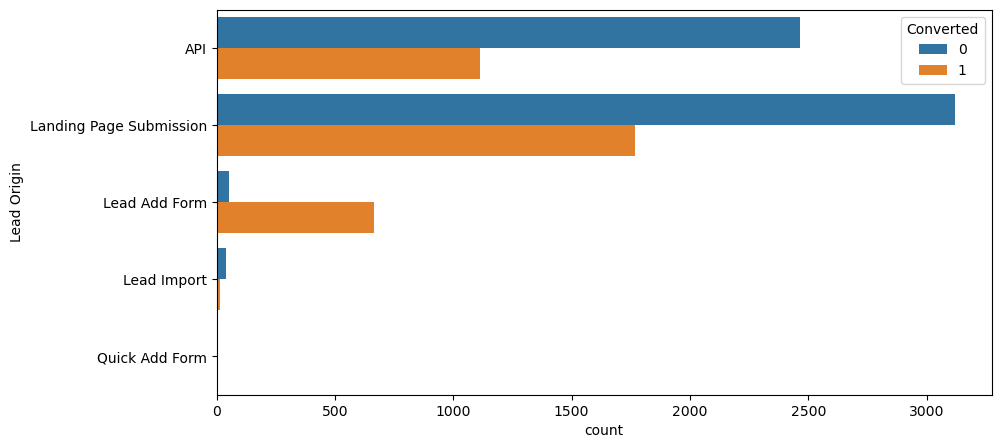

In [10]:
#Understanding Lead Conversion and Lead Origin
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Origin", hue="Converted", data=leads)
plt.show()

From Lead Origin finding, maximum lead conversion happened from Landing Page Submission.

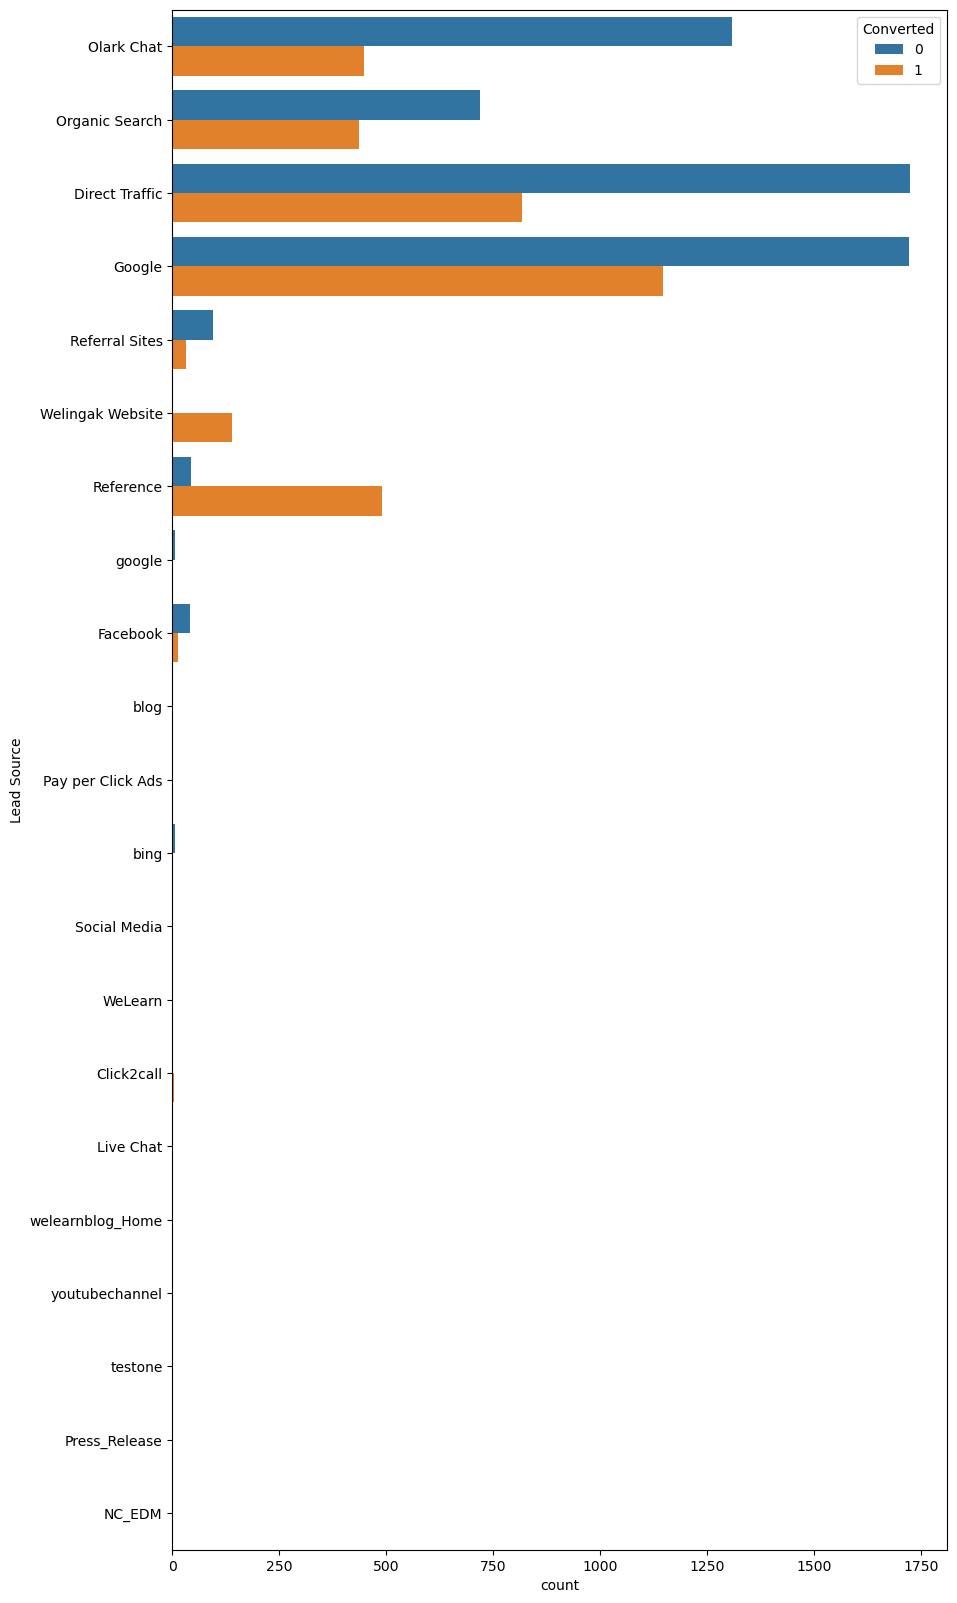

In [11]:
#Understanding Lead Conversion and Lead Source
plt.figure(figsize=(10, 20))
sns.countplot(y="Lead Source", hue="Converted", data=leads)
plt.show()

From the above graph, major lead conversion in the lead source is from 'Google'

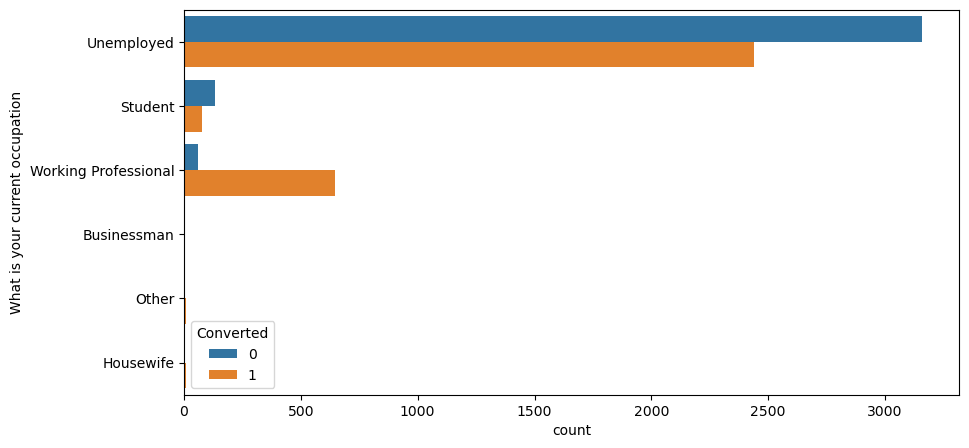

In [12]:
#Understanding Lead Conversion and Current Occupation 
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=leads)
plt.show()

From the above graph, major lead conversion is from the Unemployed Group

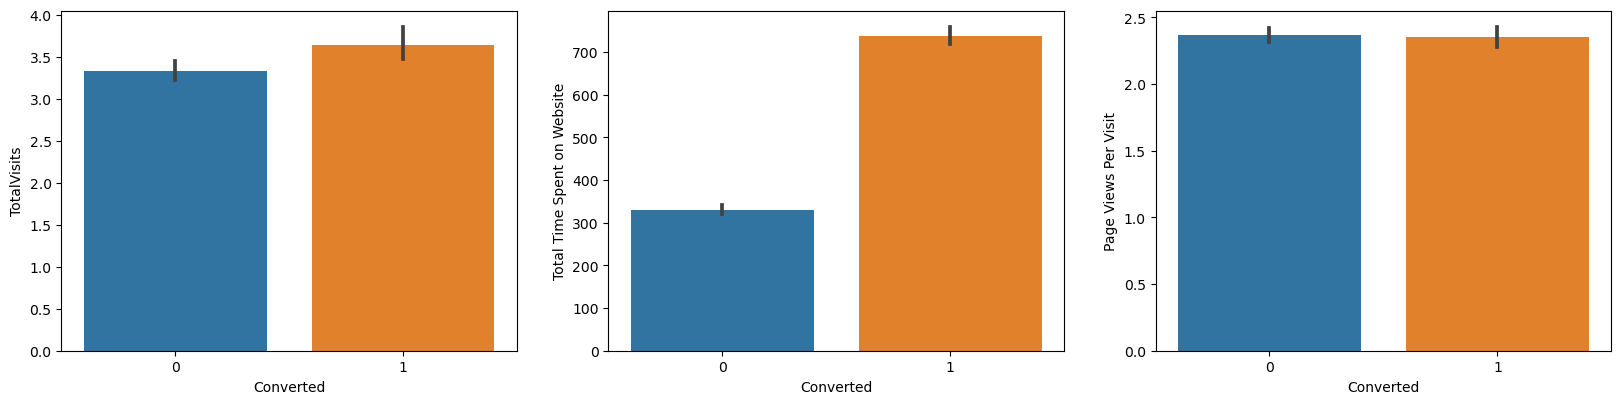

In [13]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = leads)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = leads)

plt.show()

From the above graph, we have mojor lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit

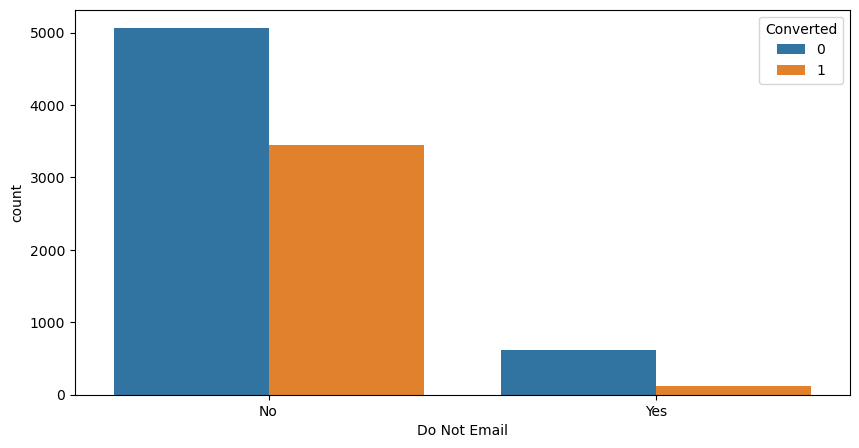

In [14]:
#Understanding Lead Conversion and Do Not Email 
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Email", hue="Converted", data=leads)
plt.show()


Based on the above graph, major lead conversion has happend from the emails that have been sent

#### Observations from EDA Process - 
- Maximum lead conversion happened from Landing Page Submission.
- Major lead conversion in the lead source is from 'Google'
- Major lead conversion is from the Unemployed Group
- Major lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit
- Major conversion has happened from the emails that have been sent

####  Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

# Data Cleaning and Preparation

1. Cleaning the dataset by removing the redundant variables/features.
2. After removing the redundant columns, we found that some columns are having label as ‘Select’ which means customer chose to not answer this question. Thus we would label null value to 'select' label.
3. Remove columns having more than 40% null values
4. Imputing missing values as per column data available

In [15]:
# Check the number of missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

####  As you can see there are a lot of column which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [16]:
# checking the value counts of each variables to find insights

for i in leads.columns:
    print(leads[i].value_counts())
    print('---------------------------------------')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
---------------------------------------
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
---------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
------------------------

**from the above the information we will make respective insights**
- we will be removing these variables
    - Prospect ID - not required
    - Lead Number - not required
    - Country- not required 
    - Receive More Updates About Our Courses- column only has 'No' doesn't makes sense to keep it.
    - Update me on Supply Chain Content - column only has 'No' doesn't makes sense to keep it
    - Get updates on DM Content - column only has 'No' doesn't makes sense to keep it
    - I agree to pay the amount through cheque -column only has 'No' doesn't makes sense to keep it
    - Magazine - column only has 'No' doesn't makes sense to keep it

- We will transform below columns of yes/no category to 1/0:
    - Do Not Email
    - Do Not Call
    - Search
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations 
    - a free copy of Mastering The Interview

In [17]:
#dropping redundant columns from above insights

leads = leads.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [18]:
leads.shape

(9240, 28)

now we have noticed that there are columns which have 'select' category which means customer did not select any of the options.
they eventually act as null values, thus we will make them null.

**dealing with 'Select' label**

In [19]:
# Creating a for loop and listing the columns having 'Select'
have_select = []
for i in leads.columns:
    if len(leads[i].isin(['Select']).unique())>1:
        have_select.append(i)
        
have_select # Columns having Select option

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [20]:
# now replacing 'Select' category with null values

for i in have_select:
    leads[i] = leads[i].replace('Select',np.NaN)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [21]:
# Checking percentage of missing values after removing the imputing 'Select' with Null values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

from above we see there are columns having more than 40% missing values, so it is better to remove these columns as it imputing them could lead to bias predictions.

**dropping columns having missing values above 40%**

In [22]:
#dropping columns having missing values more than 40%
above_40 = list(round(100*(leads.isnull().sum()/len(leads.index)), 2)[round(100*(leads.isnull().sum()/len(leads.index)), 2) > 40].index)
leads = leads.drop(above_40, axis =1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [23]:
#checking shape of data set after removing columns
leads.shape

(9240, 21)

#### Missing Values Imputation

Now we will impute values for columns having missing values less than 40%


In [24]:
# finding columns having missing values above 0 and below 40 %

below_40 = list(round(100*(leads.isnull().sum()/len(leads.index)), 2)[round(100*(leads.isnull().sum()/len(leads.index)), 2) > 0].index)

below_40

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

Note:- from the problem statement we get that the columns above, 'Last Activity', 'Tags' are provided by sales team. We will remove them before model building as the we don't a model having these features.

In [25]:
# 1. Dealing Lead Source

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
-----------
Missing values count ---> 36


- data is skwed, we are going to replace these labels (Facebook, bing, Click2call, Live Chat,Press_Release, Social Media, testone, WeLearn, blog, Pay per Click Ads, welearnblog_Home, youtubechannel, NC_EDM) in one label as 'Others'.
- we will deal with missing values by imputing missing values with max occuring label

In [26]:
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: count, dtype: int64
-----------
Missing values count ---> 36


In [27]:
# imputing missing values to max occuring label i.e. Google

leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,'Google')

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Lead Source
Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: count, dtype: int64
-----------
Missing values count ---> 0


In [28]:
# 2. Dealing with Specialization

print(leads['Specialization'].value_counts())
print('-----------')
print('Missing values count --->', leads['Specialization'].isna().sum())
print('=================================================================')

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64
-----------
Missing values count ---> 3380


- here we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results

In [29]:
# replacing missing values with label 'Missing'

leads['Specialization'] = leads['Specialization'].replace(np.NaN,'Missing')
leads['Specialization'].value_counts()

Specialization
Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [30]:
# 3. 'What is your current occupation'

print(leads['What is your current occupation'].value_counts())
print('-----------')
print('Missing values count --->', leads['What is your current occupation'].isna().sum())
print('=================================================================')

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
-----------
Missing values count ---> 2690


- here also we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results.

In [31]:
# replacing missing values with label 'Missing'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Missing')
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [32]:
# 4. 'What matters most to you in choosing a course'

print(leads['What matters most to you in choosing a course'].value_counts())
print('-----------')
print('Missing values count --->', leads['What matters most to you in choosing a course'].isna().sum())
print('=================================================================')

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
-----------
Missing values count ---> 2709


- the data is higly skewed for this column and the missing values are also high, it's better we drop the column.

In [33]:
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [34]:
# Dealing with  5. 'TotalVisits', 6. 'Page Views Per Visit', 7. 'Last Activity', 8. 'Tags'

# checking value counts and missing values count for all the columns

miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Tags'] # assigning them in a list

for i in leads[miss_max].columns:
    print(leads[i].value_counts())
    print('-----------')
    print('Missing values count --->', leads[i].isna().sum())
    print('=================================================================')

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64
-----------
Missing values count ---> 137
Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.2

In [35]:
# imputing all the missing values with label having max occurences

for i in leads[miss_max].columns:
    max_str = leads[i].value_counts()[leads[i].value_counts() == leads[i].value_counts().max()].index[0]
    leads[i] = leads[i].fillna(value=max_str)
    print(leads[i].value_counts())
    print('-----------')
    print('Missing values count --->', leads[i].isna().sum())
    print('=================================================================')

TotalVisits
0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64
-----------
Missing values count ---> 0
Page Views Per Visit
0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25 

### Checking missing values in rows

In [36]:
# checking rows having missing values more than 40%

missing_row_count = leads.apply(lambda x: round(100*(sum(x.isnull().values)/len(leads.index)),2), axis = 1)
missing_row_count[missing_row_count > 40]

Series([], dtype: float64)

there are no row with missing values more than 40%

In [37]:
# checking if any more null values in any columns

leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now all the data we have is clear of missing values and cleaned up. Now we will proceed with data transformation for some columns having yes/no labels and will convert columns with numerical data to categorical data.


# 3. Data Transformation

1. Converting yes/no category columns to binary form 1/0.
2. to deal with columns having outliers will create bins for them.
3. will remove all the redundant and repeated columns.
4. create dummy variables

In [38]:
#checking data set information to check the columns yes/no labels
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [39]:
# creating a variable and storing the columns names for run in a loop

yes_no = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']


# creating dictionary for two categories where; Yes : 1 , No : 0

category={"No":0,"Yes":1}    

for i in yes_no:
    leads[i]=leads[i].map(category)


leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


In [40]:
# checking the statistical data
leads.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
97%,1.000000,0.000000,1.000000,11.000000,1660.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


As we can see there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

Let's visualize the outliers using boxplot to understand the outliers.

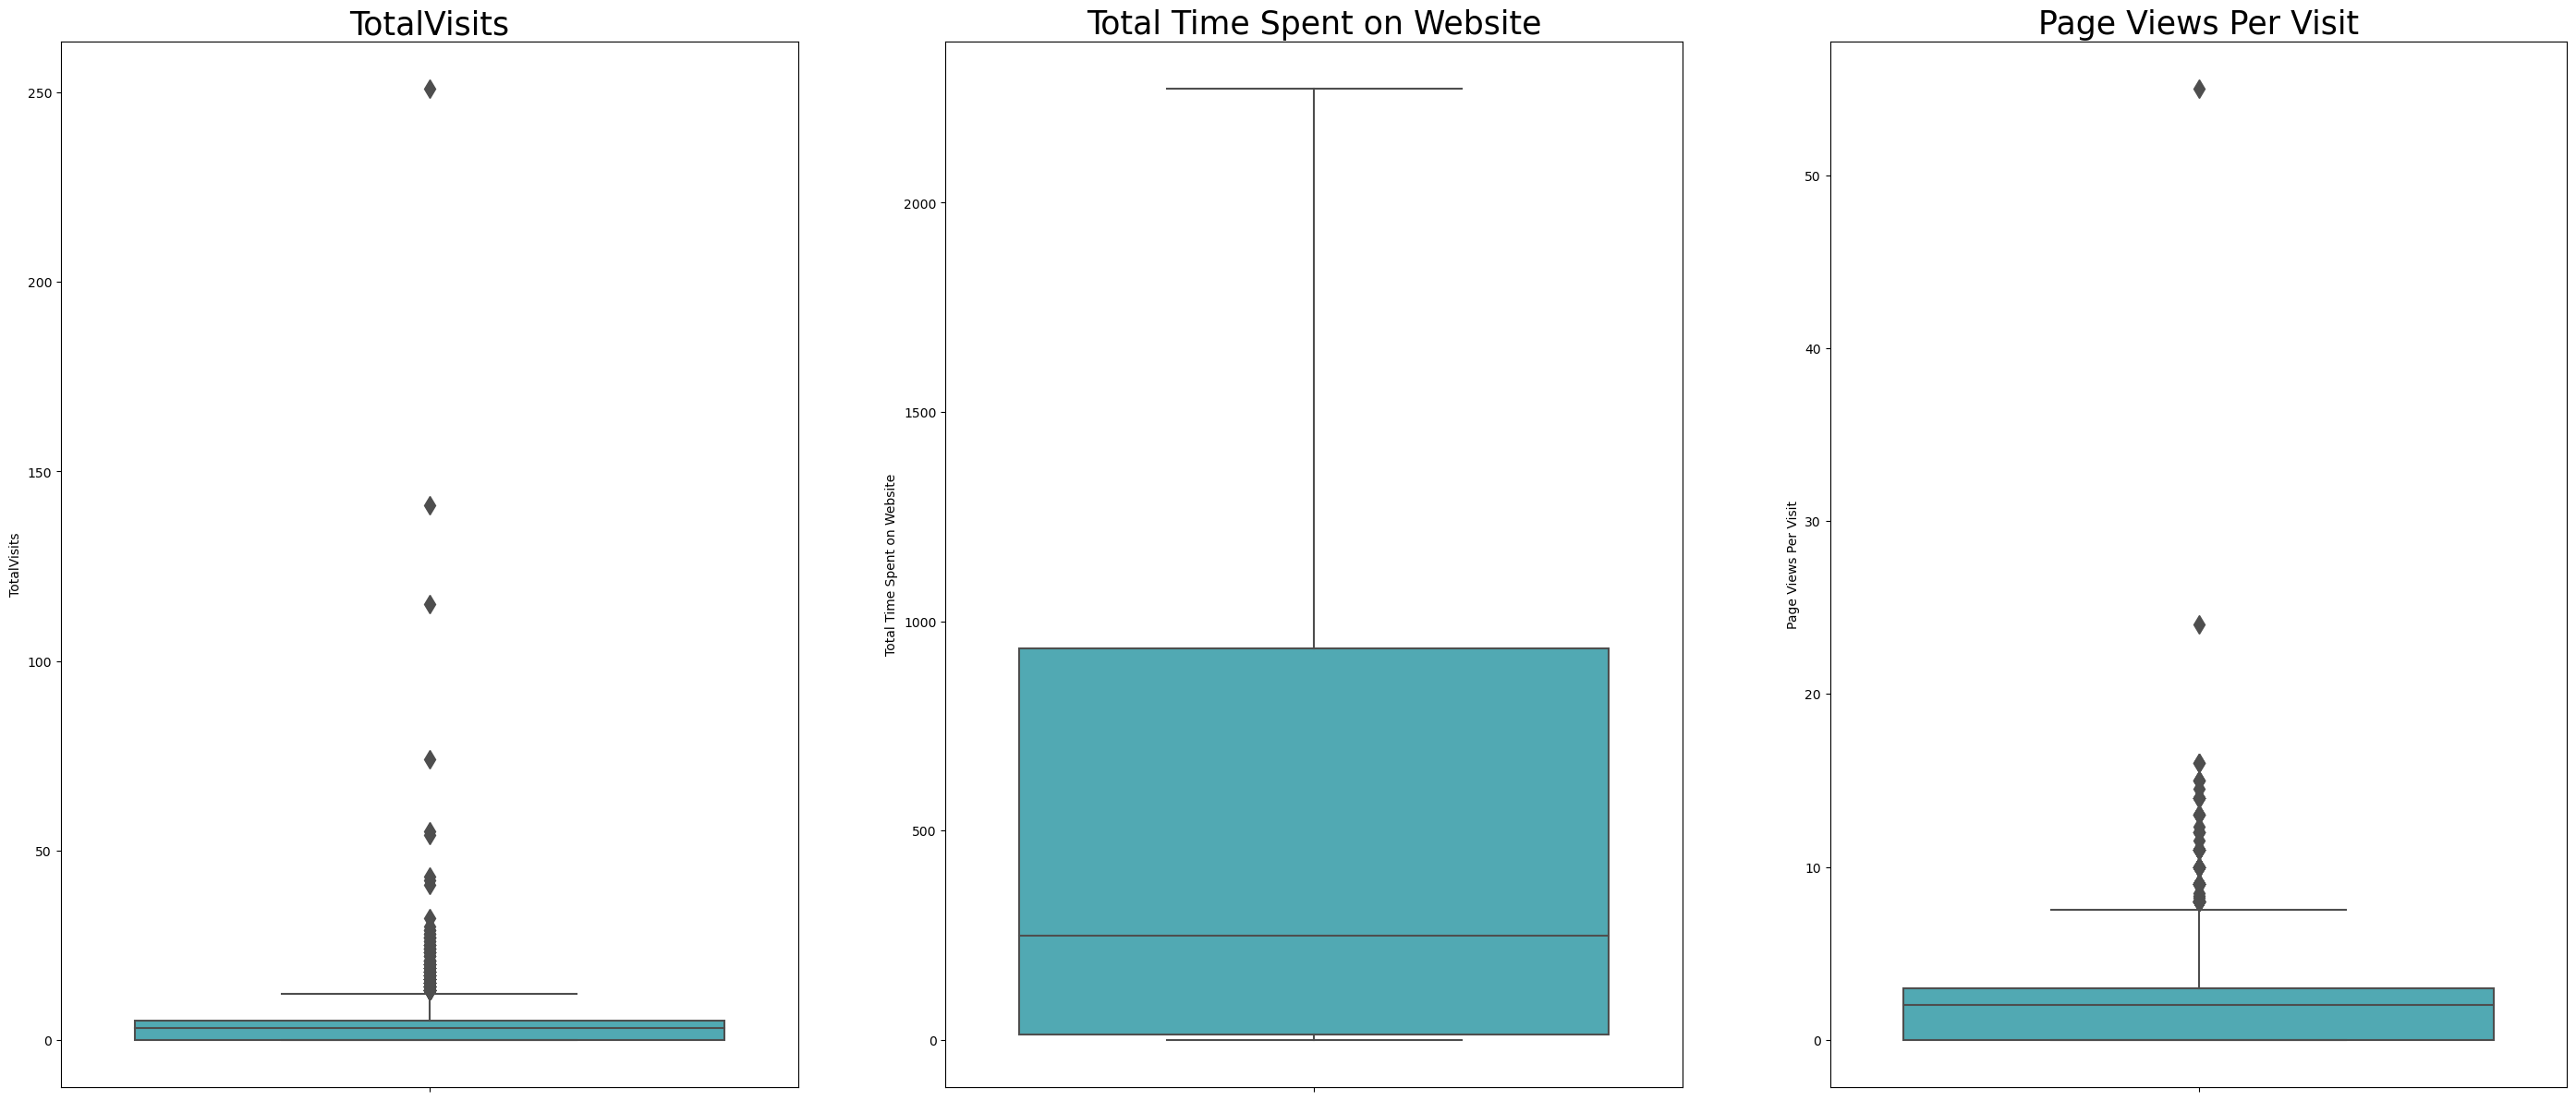

In [41]:
# setting figure size
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col_title[i],fontsize=25)
    sns.boxplot(y=leads[col_title[i]],data=leads,palette='YlGnBu',fliersize=10)

From the above boxplots we can now confirm that we have two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit'). Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will create bins for these two outliers.

#### Creating Bins

In [42]:
# 1. dealing with 'TotalVisits' variable
# As we have range from 0 to 251 we will create buckets as per need

# creating labels
TotalVisits_labels = ['TotalVisits_0', 'TotalVisits_1_2','TotalVisits_3_4','TotalVisits_5_6','TotalVisits_7_8','TotalVisits_9_10',
       'TotalVisits_11_12','TotalVisits_12_15','TotalVisits_above_15']

# creating bins for TotalVisits__labels
leads['TotalVisits'] = pd.cut(leads['TotalVisits'], bins=[-1,0.0,2,4,6,8,10,12,15,251], labels = TotalVisits_labels)


In [43]:
leads['TotalVisits'].value_counts()

TotalVisits
TotalVisits_3_4         2426
TotalVisits_0           2326
TotalVisits_1_2         2075
TotalVisits_5_6         1249
TotalVisits_7_8          533
TotalVisits_9_10         278
TotalVisits_11_12        131
TotalVisits_above_15     120
TotalVisits_12_15        102
Name: count, dtype: int64

In [44]:
# 2. dealing with 'Page Views Per Visit' variable
# As we have range from 0 to 55 we will create buckets as per need

# creating labels
pvpv_labels=['Page_Views_Per_Visit_0','Page_Views_Per_Visit_1_2','Page_Views_Per_Visit_3_4',
            'Page_Views_Per_Visit_5_6','Page_Views_Per_Visit_7_8','Page_Views_Per_Visit_9_10','Page_Views_Per_Visit_above_10']

# creating bins for 'Page Views Per Visit'
leads['Page Views Per Visit'] = pd.cut(leads['Page Views Per Visit'], bins=[-1,0,2,4,6,8,10,60], labels = pvpv_labels)


In [45]:
leads['Page Views Per Visit'].value_counts()

Page Views Per Visit
Page_Views_Per_Visit_1_2         3007
Page_Views_Per_Visit_3_4         2696
Page_Views_Per_Visit_0           2326
Page_Views_Per_Visit_5_6          851
Page_Views_Per_Visit_7_8          237
Page_Views_Per_Visit_9_10          73
Page_Views_Per_Visit_above_10      50
Name: count, dtype: int64

In [46]:
# checking data set after creating bins

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


After creating bins we removed the outliers and are now good to go. Before creating the dummy variables let's remove redundant columns/varaibles.

Also from above we know columns : 'Last Activity', 'Tags', 'Last Notable Activity' activity columns came from sales team, thus we will drop these redundant columns.


In [47]:
# dropping redundant column

redundant=['Last Activity', 'Tags', 'Last Notable Activity']

leads=leads.drop(redundant,axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Missing,Unemployed,0,0,0,0,0,0,0


In [48]:
leads.shape

(9240, 17)

Next, we will create dummy variables for mutiple levels of categories

**Creating Dummy Variables**

In [50]:
#Creating a dummy variables for 4 categories and dropping the first level. 

cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']

#creating dummy variables data set
dummy = pd.get_dummies(leads[cat], drop_first=True,dtype='int')

# Adding these dummies to our original dataset
leads = pd.concat([leads,dummy],axis=1)

#dropping the duplicate columns
leads = leads.drop(cat, axis=1)

#viewing the dataset
leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [51]:
#checking statistical data
leads.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554,0.528788,0.077706,0.005952,0.000108,0.314827,0.189935,0.124892,0.037338,0.057792,0.043615,0.006169,0.012121,0.105628,0.017208,0.012338,0.091775,0.039610,0.019264,0.090693,0.021970,0.365801,0.054437,0.010823,0.007900,0.004329,0.037771,0.021970,0.001082,0.291126,0.001732,0.022727,0.606061,0.076407,0.224567,0.262554,0.135173,0.057684,0.030087,0.014177,0.011039,0.012987,0.325433,0.291775,0.092100,0.025649,0.007900,0.005411
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559,0.499198,0.267722,0.076926,0.010403,0.464472,0.392271,0.330614,0.189598,0.233363,0.204247,0.078304,0.109433,0.307377,0.130052,0.110394,0.288724,0.195053,0.137459,0.287187,0.146592,0.481680,0.226891,0.103472,0.088537,0.065656,0.190651,0.146592,0.032882,0.454306,0.041579,0.149041,0.488648,0.265662,0.417320,0.440046,0.341927,0.233158,0.170835,0.118229,0.104491,0.113224,0.468562,0.454604,0.289182,0.158095,0.088537,0.073366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [52]:
#checking shape of the data set
leads.shape

(9240, 58)

from above tables we now see that all columns are converted to numerical data

-----------
# 4. Data Preparation

1. Split the dataset into train and test dataset and scaled the datasets.
2. After this, we plot a heatmap to check the correlations among the variables.
3. check heatmap for highly correlated features

#### train_test split

In [56]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [57]:
# putting feature varibales in "X" and target variable in "y" 

y=leads['Converted'] 
X=leads.drop('Converted',axis=1)

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [60]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6468, 57)
X_test: (2772, 57)
y_train: (6468,)
y_test: (2772,)


#### Feature Standardization

In [61]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [62]:
# Now, Scaling  'Total Time Spent on Website' variables with standard scaler and fitting on X_train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,-6.701161e-17,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.311843,0.528139,0.079468,0.005102,0.000155,0.320810,0.190167,0.121058,0.036178,0.060297,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.292672,0.001237,0.021027,0.605133,0.077613,0.226809,0.263915,0.133581,0.054731,0.029994,0.013451,0.011905,0.014069,0.329777,0.290507,0.089827,0.024583,0.008658,0.005102
std,0.268799,0.017583,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.463282,0.499246,0.270489,0.071252,0.012434,0.466824,0.392463,0.326219,0.186748,0.238054,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.482162,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.455024,0.035150,0.143484,0.488860,0.267582,0.418800,0.440788,0.340228,0.227472,0.170583,0.115204,0.108466,0.117786,0.470169,0.454031,0.285956,0.154861,0.092652,0.071252
min,0.000000,0.000000,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [63]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 38.54


#### Correlation in the dataset

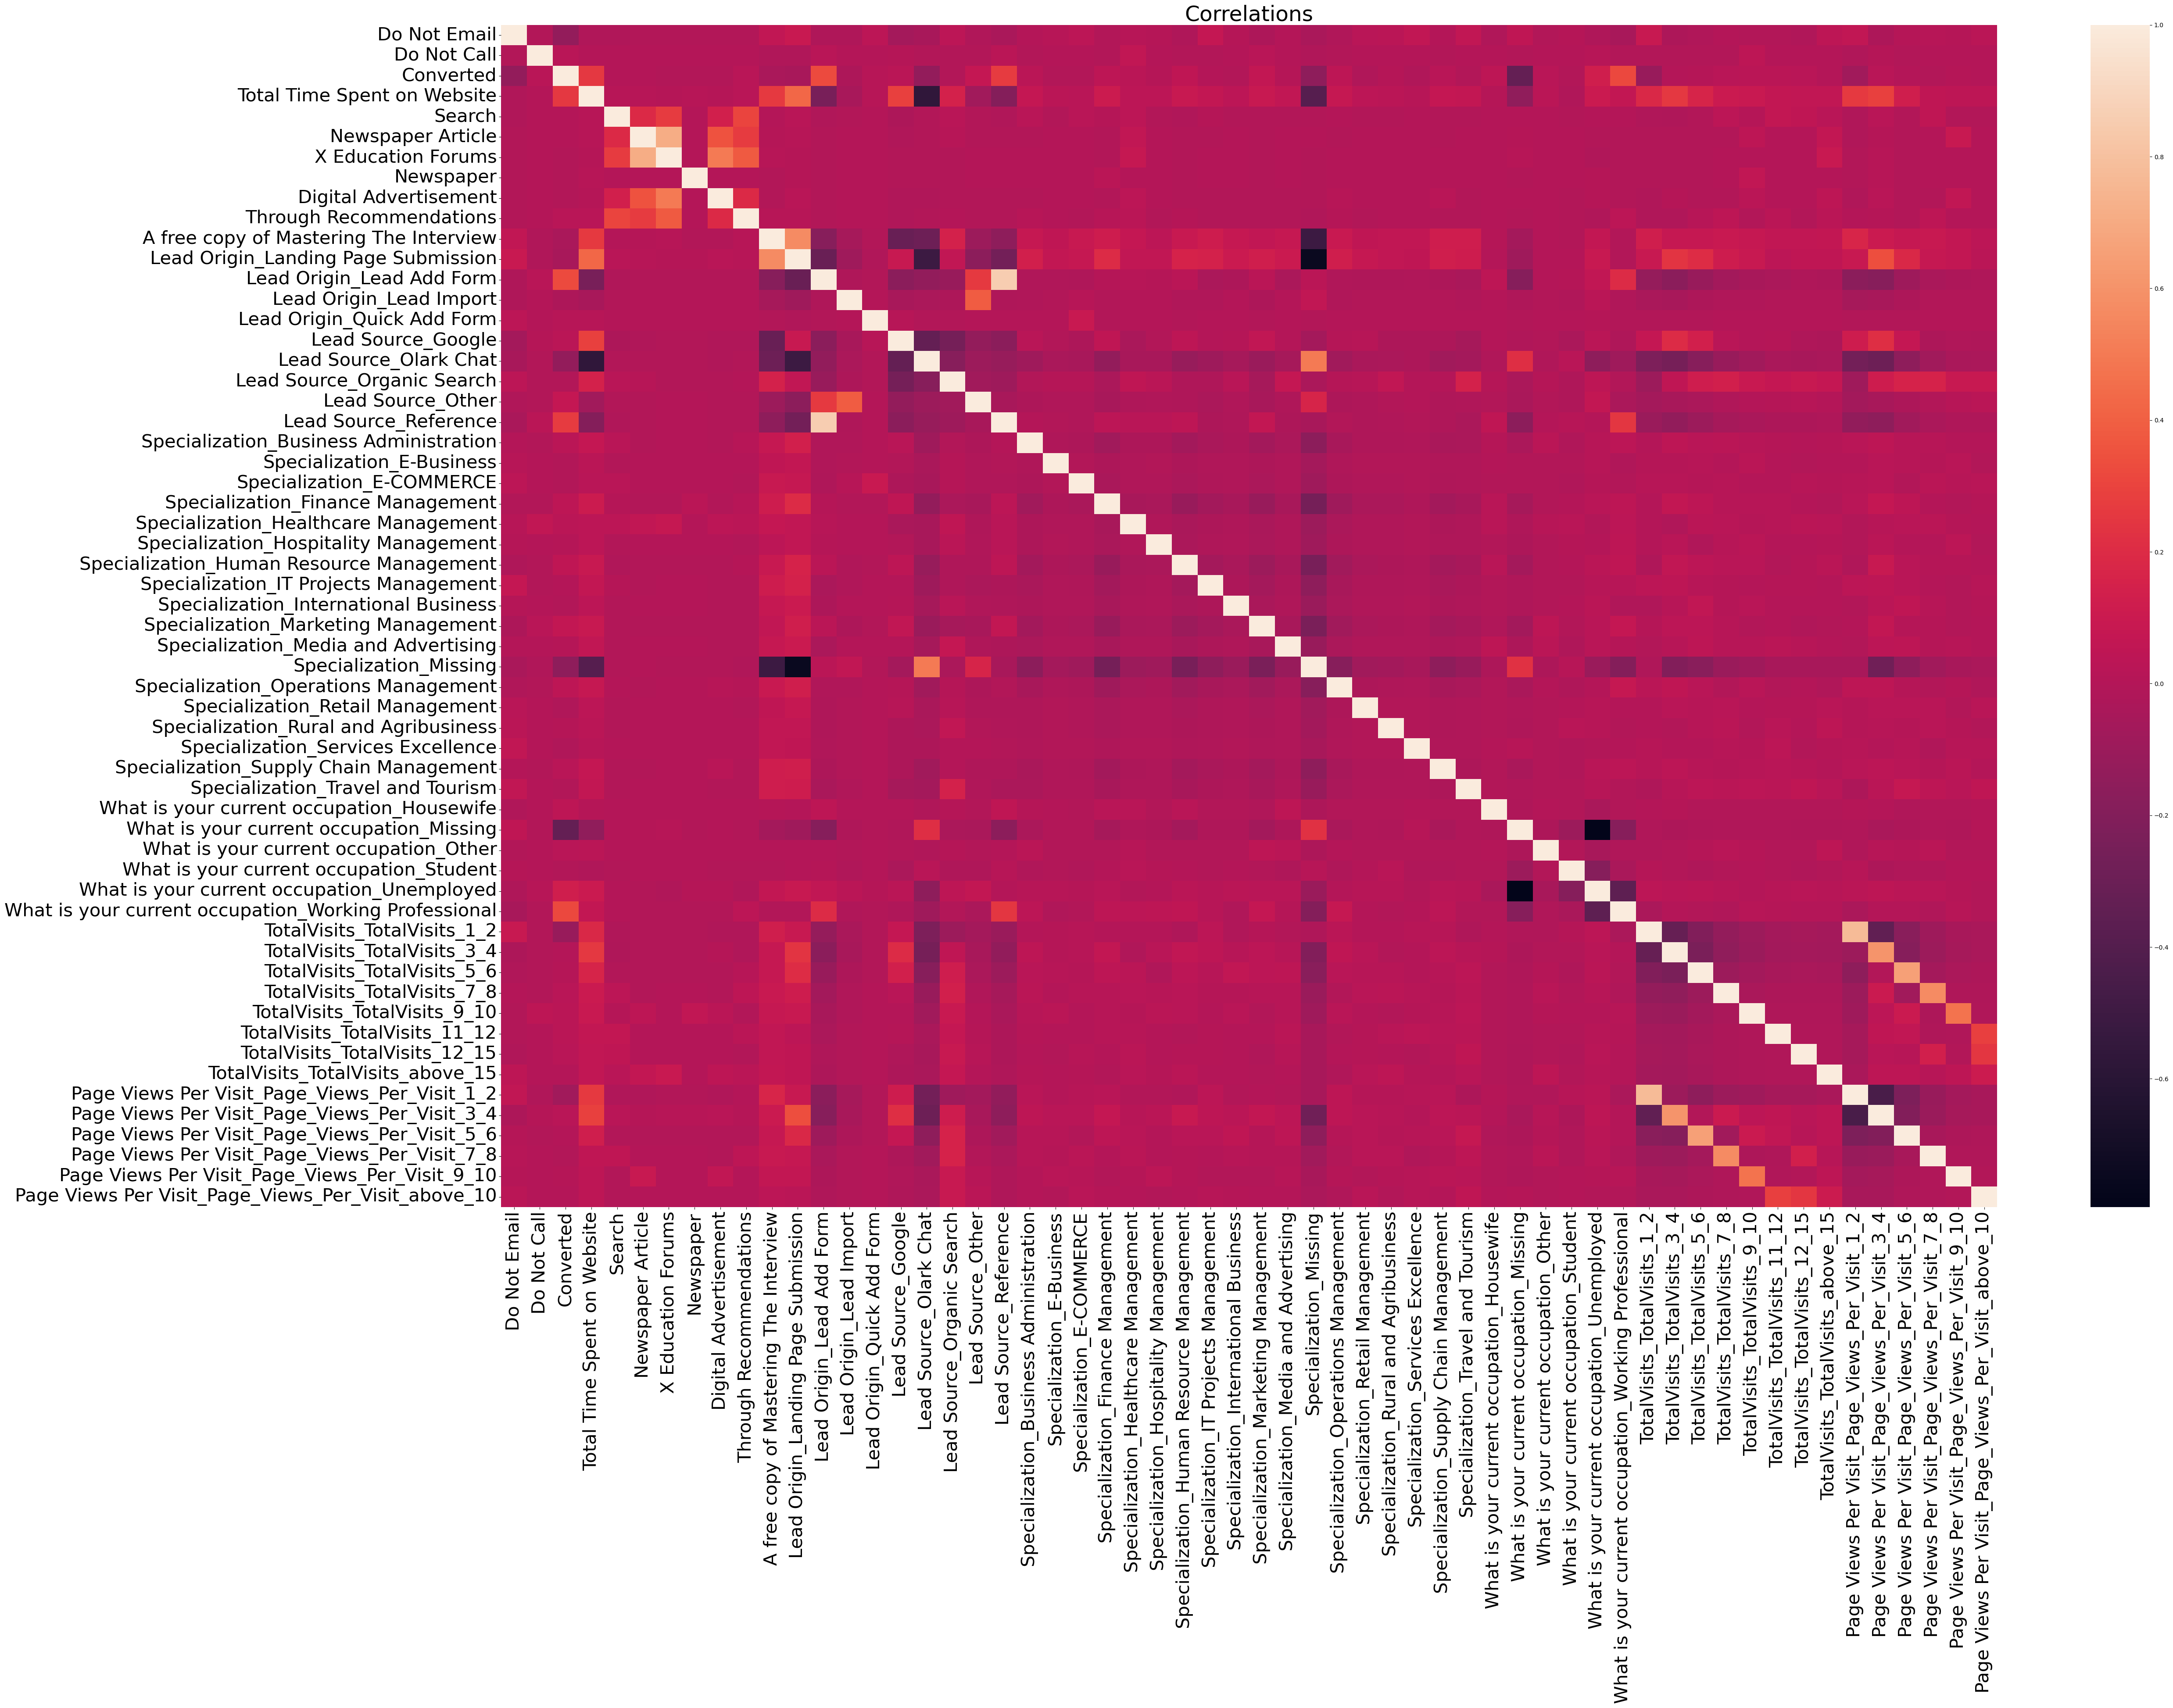

In [64]:
# setting the figure size
plt.figure(figsize=(55,35))

# Plotting a heatmap

sns.heatmap(leads.corr(method='spearman'))
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

Correlation is shown above by heatmap, from above we couldn't find much which features are highly correlated and to drop thus we will now proceed with building our model and based on the p-values and VIFs, we will again check for correlation.

# 5. Building a Model

In [65]:
# importing statmodels library for statistical summary and model creation

import statsmodels.api as sm

We are going to use hybrid model creation using RFE and manual features selection

### feature selection using RFE 

In [66]:
# Importing RFE and logistic regression libraries from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# creating an object

logreg = LogisticRegression()                

In [69]:
# RFE model with 15 variables

rfe = RFE(logreg,step=15) 

# fitting the model

rfe = rfe.fit(X_train,y_train)   

In [70]:
#listing which all columns are selected(True) by RFE and which all are rejected(False)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 3),
 ('Newspaper Article', True, 1),
 ('X Education Forums', False, 2),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 3),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Other', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_E-Business', False, 3),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_Finance Management', False, 3),
 ('Specialization_Healthcare Management', False, 3),
 ('Specialization_Hospitality Management', True, 

In [71]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'X Education Forums', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'TotalVisits_TotalVisits_9_10', 'TotalVisits_TotalVisits_11_12', 'TotalVisits_TotalVisits_12_15'], dtype='object')

In [72]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Newspaper Article,Newspaper,Digital Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Reference,Specialization_Hospitality Management,Specialization_International Business,Specialization_Missing,Specialization_Retail Management,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
1871,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.005716,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3516,0,-0.691418,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8105,0,1.365219,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3934,0,-0.885371,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Model 1**

In [73]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()                                                       #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.9
Date:                Sat, 18 May 2024   Deviance:                       5631.8
Time:                        15:10:58   Pearson chi2:                 8.27e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3679
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2368      0.139      8.868      0.000       0.963       1.510
Do Not Email                                            -1.2907      0.164     -7.864      0.000      -1.612      -0.969
Total Time Spent on Website                              1.1343      0.040     28.482      0.000       1.056       1.212
Newspaper Article                                       22.8404   3.63e+04      0.001      0.999   -7.12e+04    7.13e+04
Newspaper                                              -26.1074   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                  -43.7192   5.14e+04     -0.001      0.999   -1.01e+05    1.01e+05
Lead Origin_Landing Page Submission                     -0.8876      0.121     -7.313      0.000      -1.125      -0.650
Lead Origin_Lead Add Form                                3.3695      0.365      9.228      0.000       2.654       4.085
Lead Origin_Lead Import                                 -1.6241      0.541     -3.001      0.003      -2.685      -0.563
Lead Source_Reference                                   -1.2491      0.408     -3.065      0.002      -2.048      -0.450
Specialization_Hospitality Management                   -1.0041      0.324     -3.098      0.002      -1.639      -0.369
Specialization_International Business                   -0.4589      0.257     -1.787      0.074      -0.962       0.044
Specialization_Missing                                  -1.0305      0.122     -8.475      0.000      -1.269      -0.792
Specialization_Retail Management                        -0.4047      0.326     -1.240      0.215      -1.044       0.235
What is your current occupation_Housewife               23.3442   2.22e+04      0.001      0.999   -4.36e+04    4.36e+04
What is your current occupation_Missing                 -1.1957      0.084    -14.298      0.000      -1.360      -1.032
What is your current occupation_Other                   -1.0862      0.802     -1.354      0.176      -2.658       0.486
What is your current occupation_Working Professional     2.4121      0.186     12.982      0.000       2.048       2.776
TotalVisits_TotalVisits_1_2                             -1.0176      0.195     -5.230      0.000      -1.399      -0.636
TotalVisits_TotalVisits_3_4                             -0.6238      0.169     -3.686      0.000      -0.956      -0.292
TotalVisits_TotalVisits_5_6                             -0.3011      0.178     -1.693      0.090      -0.650       0.047
TotalVisits_TotalVisits_7_8                             -0.2017      0.221     -0.911      0.362      -0.636       0.232
TotalVisits_TotalVisits_above_15                        -0

Now, From the above summary presented there are some features having high p -values, we will drop features having insignificant values one by one and create new models until all the features attain significant p-value<0.05 and vif-values < 4.

#### Calculating VIF

In [76]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe[rfe_col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif   # Viewing the dataset

,Features,VIF
22,Page Views Per Visit_Page_Views_Per_Visit_1_2,12.26
23,Page Views Per Visit_Page_Views_Per_Visit_3_4,9.42
17,TotalVisits_TotalVisits_1_2,8.39
18,TotalVisits_TotalVisits_3_4,7.54
5,Lead Origin_Landing Page Submission,5.07
6,Lead Origin_Lead Add Form,4.45
8,Lead Source_Reference,4.36
19,TotalVisits_TotalVisits_5_6,4.33
24,Page Views Per Visit_Page_Views_Per_Visit_5_6,3.76
20,TotalVisits_TotalVisits_7_8,2.75


**Model 2**

- for this we are dropping 'const','What is your current occupation_Housewife' due to high p-value

In [78]:
# Dropping the most insignificant values 'What is your current occupation_Housewife' and constant

X_train_rfe2 = X_train_1.drop(['const','What is your current occupation_Housewife'],axis=1)

# Creating a new model 2

X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.0
Date:                Sat, 18 May 2024   Deviance:                       5642.0
Time:                        15:34:42   Pearson chi2:                 8.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2392      0.139      8.885      0.000       0.966       1.513
Do Not Email                                            -1.2950      0.164     -7.890      0.000      -1.617      -0.973
Total Time Spent on Website                              1.1331      0.040     28.483      0.000       1.055       1.211
Newspaper Article                                       21.8434    2.2e+04      0.001      0.999   -4.32e+04    4.32e+04
Newspaper                                              -25.1061   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -41.7208   3.12e+04     -0.001      0.999   -6.11e+04    6.11e+04
Lead Origin_Landing Page Submission                     -0.8846      0.121     -7.293      0.000      -1.122      -0.647
Lead Origin_Lead Add Form                                3.3711      0.365      9.231      0.000       2.655       4.087
Lead Origin_Lead Import                                 -1.6234      0.541     -3.000      0.003      -2.684      -0.563
Lead Source_Reference                                   -1.2342      0.408     -3.028      0.002      -2.033      -0.435
Specialization_Hospitality Management                   -1.0100      0.324     -3.116      0.002      -1.645      -0.375
Specialization_International Business                   -0.4646      0.257     -1.810      0.070      -0.968       0.038
Specialization_Missing                                  -1.0346      0.122     -8.510      0.000      -1.273      -0.796
Specialization_Retail Management                        -0.4105      0.326     -1.258      0.208      -1.050       0.229
What is your current occupation_Missing                 -1.1986      0.084    -14.337      0.000      -1.362      -1.035
What is your current occupation_Other                   -1.0878      0.802     -1.356      0.175      -2.660       0.484
What is your current occupation_Working Professional     2.4053      0.186     12.947      0.000       2.041       2.769
TotalVisits_TotalVisits_1_2                             -1.0162      0.194     -5.227      0.000      -1.397      -0.635
TotalVisits_TotalVisits_3_4                             -0.6148      0.169     -3.634      0.000      -0.946      -0.283
TotalVisits_TotalVisits_5_6                             -0.3013      0.178     -1.694      0.090      -0.650       0.047
TotalVisits_TotalVisits_7_8                             -0.2019      0.221     -0.912      0.362      -0.636       0.232
TotalVisits_TotalVisits_above_15                        -0.3967      0.312     -1.271      0.204      -1.009       0.215
Page Views Per Visit_Page_Views_Per_Visit_1_2           -0

In [79]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
21,Page Views Per Visit_Page_Views_Per_Visit_1_2,12.26
22,Page Views Per Visit_Page_Views_Per_Visit_3_4,9.42
16,TotalVisits_TotalVisits_1_2,8.39
17,TotalVisits_TotalVisits_3_4,7.54
5,Lead Origin_Landing Page Submission,5.07
6,Lead Origin_Lead Add Form,4.45
8,Lead Source_Reference,4.35
18,TotalVisits_TotalVisits_5_6,4.33
23,Page Views Per Visit_Page_Views_Per_Visit_5_6,3.76
19,TotalVisits_TotalVisits_7_8,2.75


**Model 3**

- for this we are dropping 'const','Specialization_Missing' as this is has no information.

In [80]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe3 = X_train_2.drop(['const','Specialization_Missing'],axis=1)

# Creating a new model 3

X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.3
Date:                Sat, 18 May 2024   Deviance:                       5716.5
Time:                        15:36:30   Pearson chi2:                 7.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3595
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3485      0.089      3.922      0.000       0.174       0.523
Do Not Email                                            -1.3028      0.163     -7.988      0.000      -1.622      -0.983
Total Time Spent on Website                              1.1432      0.040     28.784      0.000       1.065       1.221
Newspaper Article                                       20.9486   2.34e+04      0.001      0.999   -4.59e+04     4.6e+04
Newspaper                                              -25.1667   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -40.8693   3.31e+04     -0.001      0.999    -6.5e+04    6.49e+04
Lead Origin_Landing Page Submission                     -0.1695      0.086     -1.979      0.048      -0.337      -0.002
Lead Origin_Lead Add Form                                3.3250      0.363      9.148      0.000       2.613       4.037
Lead Origin_Lead Import                                 -1.4156      0.530     -2.674      0.008      -2.453      -0.378
Lead Source_Reference                                   -0.7866      0.402     -1.956      0.050      -1.575       0.001
Specialization_Hospitality Management                   -0.8567      0.318     -2.697      0.007      -1.479      -0.234
Specialization_International Business                   -0.3159      0.254     -1.242      0.214      -0.814       0.183
Specialization_Retail Management                        -0.3057      0.325     -0.941      0.347      -0.942       0.331
What is your current occupation_Missing                 -1.2822      0.083    -15.480      0.000      -1.445      -1.120
What is your current occupation_Other                   -0.8978      0.769     -1.168      0.243      -2.404       0.609
What is your current occupation_Working Professional     2.5576      0.182     14.072      0.000       2.201       2.914
TotalVisits_TotalVisits_1_2                             -1.1145      0.193     -5.772      0.000      -1.493      -0.736
TotalVisits_TotalVisits_3_4                             -0.6687      0.168     -3.973      0.000      -0.999      -0.339
TotalVisits_TotalVisits_5_6                             -0.3487      0.177     -1.971      0.049      -0.695      -0.002
TotalVisits_TotalVisits_7_8                             -0.2332      0.220     -1.058      0.290      -0.665       0.199
TotalVisits_TotalVisits_above_15                        -0.4339      0.311     -1.394      0.163      -1.044       0.176
Page Views Per Visit_Page_Views_Per_Visit_1_2           -0.2243      0.203     -1.104      0.269      -0.622       0.174
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0

In [81]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
20,Page Views Per Visit_Page_Views_Per_Visit_1_2,11.56
21,Page Views Per Visit_Page_Views_Per_Visit_3_4,8.76
15,TotalVisits_TotalVisits_1_2,8.39
16,TotalVisits_TotalVisits_3_4,7.54
17,TotalVisits_TotalVisits_5_6,4.33
8,Lead Source_Reference,4.25
6,Lead Origin_Lead Add Form,4.20
5,Lead Origin_Landing Page Submission,3.68
22,Page Views Per Visit_Page_Views_Per_Visit_5_6,3.55
18,TotalVisits_TotalVisits_7_8,2.75


In [82]:
# checking all the coefficients
logr3.params.sort_values(ascending=False)

Newspaper Article                                       20.948575
Lead Origin_Lead Add Form                                3.325024
What is your current occupation_Working Professional     2.557553
Total Time Spent on Website                              1.143228
const                                                    0.348519
Lead Origin_Landing Page Submission                     -0.169453
Page Views Per Visit_Page_Views_Per_Visit_1_2           -0.224272
TotalVisits_TotalVisits_7_8                             -0.233155
Specialization_Retail Management                        -0.305723
Specialization_International Business                   -0.315891
TotalVisits_TotalVisits_5_6                             -0.348691
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.356667
TotalVisits_TotalVisits_above_15                        -0.433899
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.518118
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.538637
TotalVisit

**Model 4**

- for this we are dropping 'Newspaper Article' as this is due to high p-value.

In [84]:
# Dropping the most insignificant values 'What is your current occupation_Housewife' and constant

X_train_rfe4 = X_train_3.drop(['const','Newspaper Article'],axis=1)

# Creating a new model 4

X_train_4=sm.add_constant(X_train_rfe4)                                 # Adding constant
logr4=sm.GLM(y_train,X_train_4,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr4.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.8
Date:                Sat, 18 May 2024   Deviance:                       5717.7
Time:                        15:53:06   Pearson chi2:                 7.66e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3594
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3491      0.089      3.928      0.000       0.175       0.523
Do Not Email                                            -1.3032      0.163     -7.991      0.000      -1.623      -0.984
Total Time Spent on Website                              1.1436      0.040     28.792      0.000       1.066       1.221
Newspaper                                              -24.1682   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                  -20.2295   1.67e+04     -0.001      0.999   -3.28e+04    3.27e+04
Lead Origin_Landing Page Submission                     -0.1693      0.086     -1.977      0.048      -0.337      -0.001
Lead Origin_Lead Add Form                                3.3249      0.363      9.147      0.000       2.613       4.037
Lead Origin_Lead Import                                 -1.4159      0.530     -2.674      0.007      -2.454      -0.378
Lead Source_Reference                                   -0.7865      0.402     -1.956      0.050      -1.575       0.002
Specialization_Hospitality Management                   -0.8595      0.318     -2.705      0.007      -1.482      -0.237
Specialization_International Business                   -0.3160      0.254     -1.242      0.214      -0.814       0.183
Specialization_Retail Management                        -0.3059      0.325     -0.942      0.346      -0.942       0.331
What is your current occupation_Missing                 -1.2827      0.083    -15.486      0.000      -1.445      -1.120
What is your current occupation_Other                   -0.8980      0.769     -1.168      0.243      -2.405       0.609
What is your current occupation_Working Professional     2.5564      0.182     14.065      0.000       2.200       2.913
TotalVisits_TotalVisits_1_2                             -1.1151      0.193     -5.776      0.000      -1.494      -0.737
TotalVisits_TotalVisits_3_4                             -0.6694      0.168     -3.977      0.000      -0.999      -0.339
TotalVisits_TotalVisits_5_6                             -0.3493      0.177     -1.974      0.048      -0.696      -0.003
TotalVisits_TotalVisits_7_8                             -0.2338      0.220     -1.061      0.289      -0.666       0.198
TotalVisits_TotalVisits_above_15                        -0.4365      0.311     -1.403      0.161      -1.046       0.173
Page Views Per Visit_Page_Views_Per_Visit_1_2           -0.2242      0.203     -1.104      0.269      -0.622       0.174
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.3567      0.192     -1.856      0.063      -0.733       0.020
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0

In [86]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
19,Page Views Per Visit_Page_Views_Per_Visit_1_2,11.56
20,Page Views Per Visit_Page_Views_Per_Visit_3_4,8.76
14,TotalVisits_TotalVisits_1_2,8.39
15,TotalVisits_TotalVisits_3_4,7.54
16,TotalVisits_TotalVisits_5_6,4.33
7,Lead Source_Reference,4.25
5,Lead Origin_Lead Add Form,4.20
4,Lead Origin_Landing Page Submission,3.68
21,Page Views Per Visit_Page_Views_Per_Visit_5_6,3.55
17,TotalVisits_TotalVisits_7_8,2.75


In [87]:
# checking all the coefficients
logr4.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                                3.324908
What is your current occupation_Working Professional     2.556415
Total Time Spent on Website                              1.143585
const                                                    0.349051
Lead Origin_Landing Page Submission                     -0.169263
Page Views Per Visit_Page_Views_Per_Visit_1_2           -0.224226
TotalVisits_TotalVisits_7_8                             -0.233768
Specialization_Retail Management                        -0.305878
Specialization_International Business                   -0.315972
TotalVisits_TotalVisits_5_6                             -0.349260
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.356682
TotalVisits_TotalVisits_above_15                        -0.436540
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.518193
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.538613
TotalVisits_TotalVisits_3_4                             -0.669373
Lead Sourc

Now we have good amount of features having significant p-values and VIF-values<4. We will consider model 4 as our final model

### Predicting the train dataset with our final model

In [88]:
#predicting train dataset with final model

y_train_pred=logr4.predict(X_train_4)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.339966,1871
6795,0,0.330201,6795
3516,0,0.240930,3516
8105,0,0.705490,8105
3934,0,0.339966,3934


-----
### ROC Curve Plotting
- ROC curve shows the trade off between True postive rate and False positive rate - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate.
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [89]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( actual, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

**ROC CURVE**

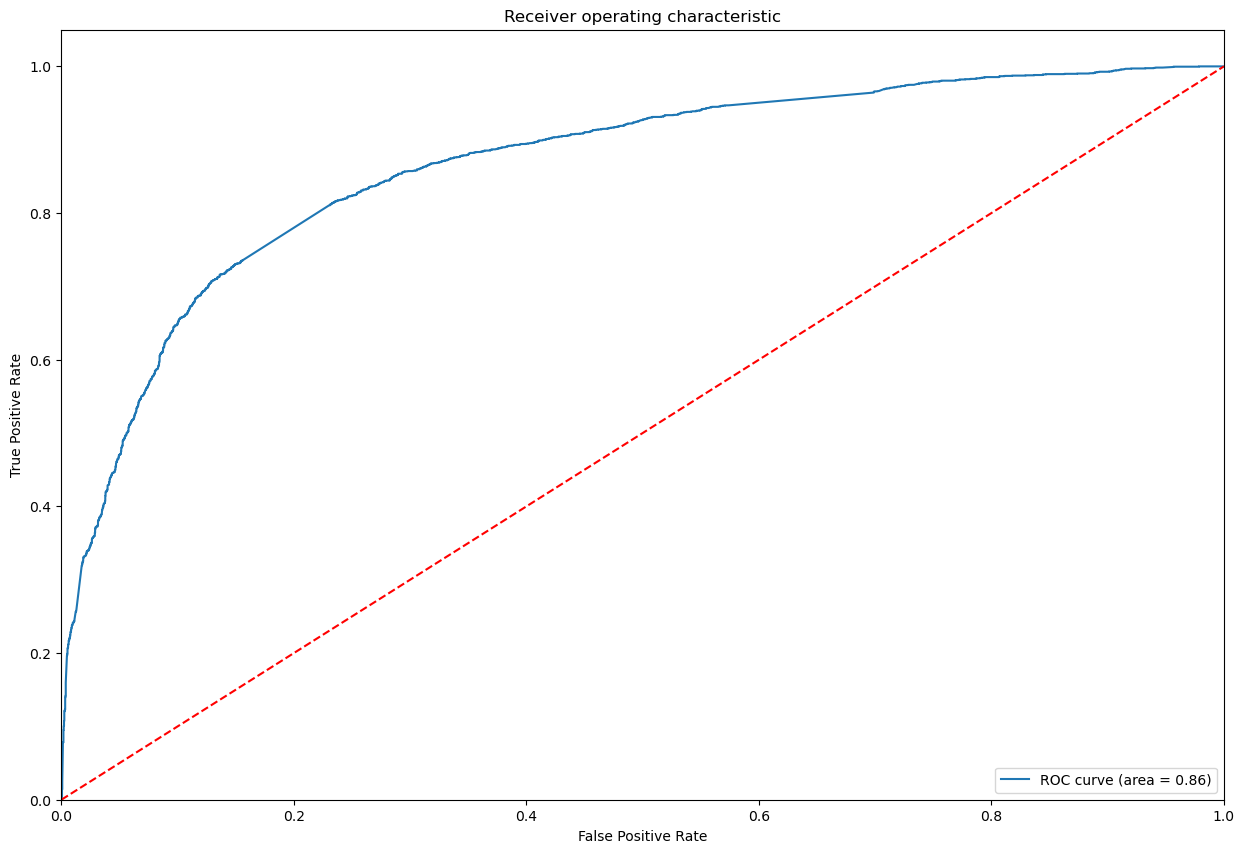

In [90]:
# Calling the roc curve function for plotting

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [91]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.339966,1871,1,1,1,1,0,0,0,0,0,0
6795,0,0.330201,6795,1,1,1,1,0,0,0,0,0,0
3516,0,0.240930,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.705490,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.339966,3934,1,1,1,1,0,0,0,0,0,0


**Accurary, Sensitivity, Specificity** 

In [92]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.524583    0.980130     0.243878
0.2          0.2  0.709647    0.895377     0.595202
0.3          0.3  0.775046    0.830900     0.740630
0.4          0.4  0.808442    0.706813     0.871064
0.5          0.5  0.804422    0.649635     0.899800
0.6          0.6  0.791744    0.585564     0.918791
0.7          0.7  0.774737    0.500811     0.943528
0.8          0.8  0.745207    0.384428     0.967516
0.9          0.9  0.697588    0.217356     0.993503


**PLotting Accuracy, Sensitivity and Specificity**

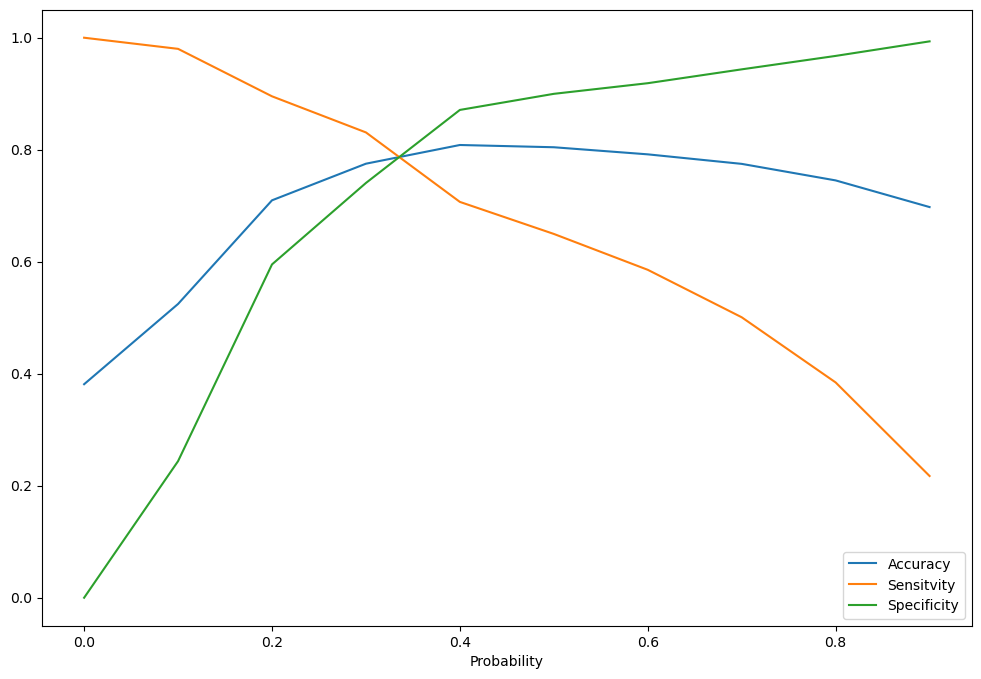

In [93]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [94]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.339966,1871,1,1,1,1,0,0,0,0,0,0,1
6795,0,0.330201,6795,1,1,1,1,0,0,0,0,0,0,1
3516,0,0.240930,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.705490,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.339966,3934,1,1,1,1,0,0,0,0,0,0,1


In [95]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[2964, 1038],
       [ 417, 2049]], dtype=int64)

In [96]:
#Sensitivity score
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_train)  
print('Specificity:',Specificity_train) 

Sensitivity: 83.09
Specificity: 74.06


In [97]:
#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train) 
print('Recall:',Recall_train)     

Precision: 66.38
Recall: 83.09


In [98]:
# Checking accuracy for train dataset 
from sklearn import metrics

Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 77.5


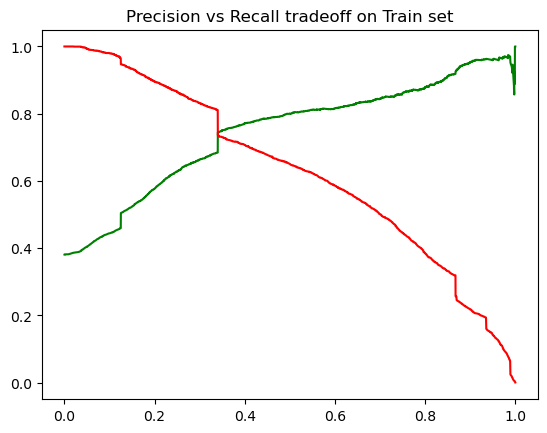

In [99]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

------
# Prediction on the test dataset
### Scaling the test dataset

In [100]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [102]:
# Predicting the test dataset with our final model

test_cols=X_train_4.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr4.predict(X_test_final)      # Predicting the final test set

In [103]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.353641,4269
2376,1,0.867031,2376
7766,1,0.759323,7766
9199,0,0.339966,9199
4359,1,0.867031,4359


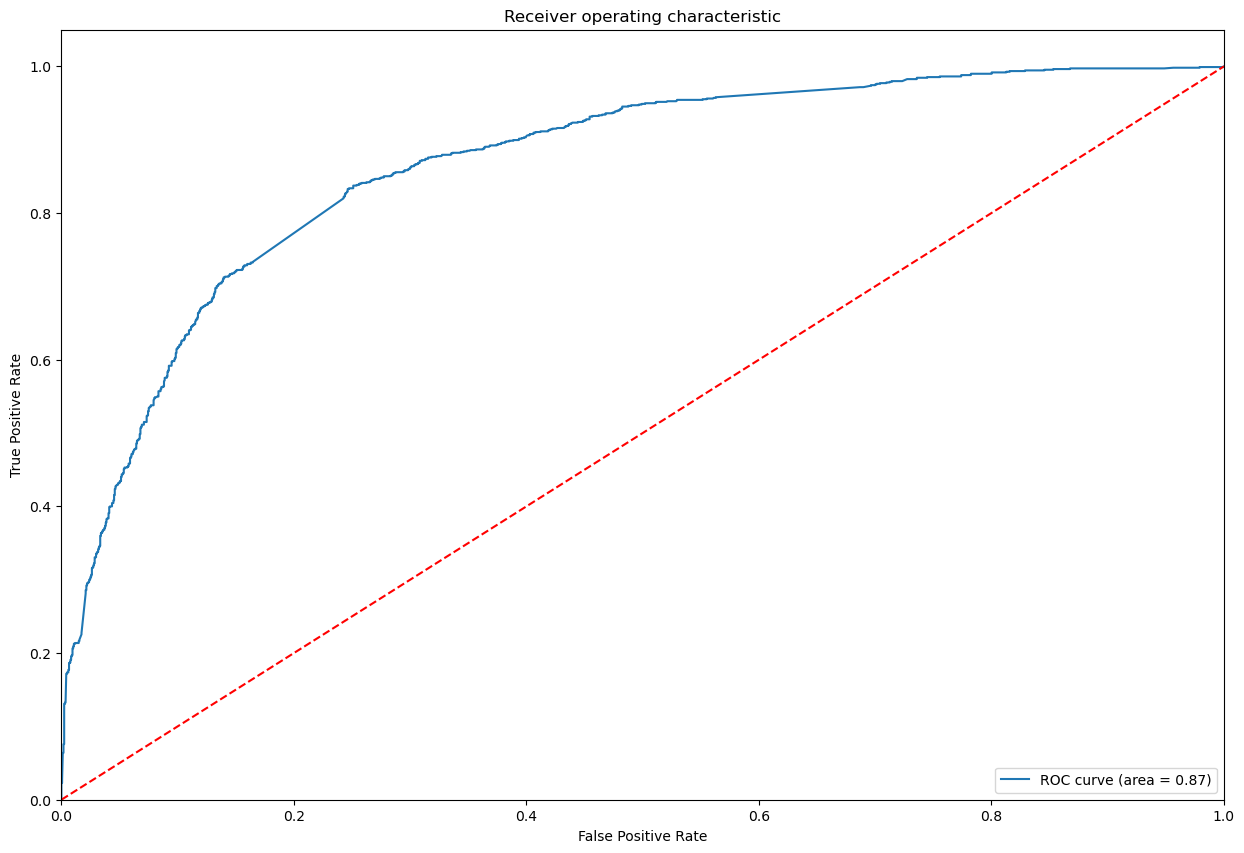

In [104]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

## Model Evaluation

In [105]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.353641,4269,1
2376,1,0.867031,2376,1
7766,1,0.759323,7766,1
9199,0,0.339966,9199,1
4359,1,0.867031,4359,1


In [106]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1228,  449],
       [ 170,  925]], dtype=int64)

In [107]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test) 

Sensitivity: 84.47
Specificity: 73.23


In [108]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test) 
print('Recall:',Recall_test)     

Precision: 67.32
Recall: 84.47


In [109]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 77.67


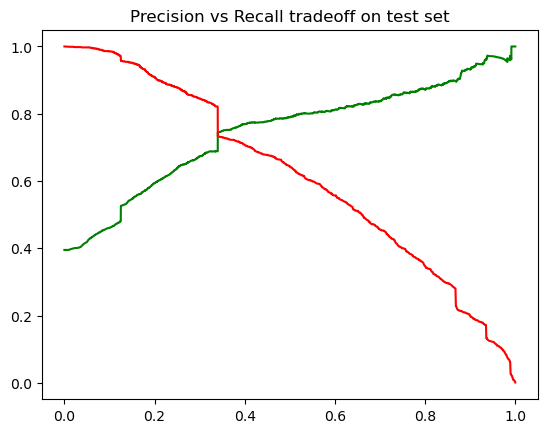

In [110]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [111]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  74.9291211016606


### Metrics Comparison between Train data set and Test data set

In [113]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test)
print('Precision:',Precision_test) 
print('Recall:',Recall_test)
print('Accuracy:',Accuracy_test)

Train Data Set metrics:

Sensitivity: 83.09
Specificity: 74.06
Precision: 66.38
Recall: 83.09
Accuracy: 77.5

Test Data Set metrics:

Sensitivity: 84.47
Specificity: 73.23
Precision: 67.32
Recall: 84.47
Accuracy: 77.67


### Assigning a Lead Score to the Predicted values based on Lead Number 

In [114]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_test_pred_final['Lead Number']=leads.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.353641,4269,1,0,35
2376,1,0.867031,2376,1,0,87
7766,1,0.759323,7766,1,0,76
9199,0,0.339966,9199,1,0,34
4359,1,0.867031,4359,1,0,87
9186,1,0.396620,9186,1,0,40
1631,1,0.603367,1631,1,0,60
8963,1,0.269677,8963,0,0,27
8007,0,0.081534,8007,0,0,8
5324,1,0.178878,5324,0,0,18


## Conclusion
### Valuable Insights -

- The Sensitivity and Specificity, Accuracy, Precision and Recall score we got from test set are almost accurate.
- We have high recall score than precision score which is a sign of good model.
- In business terms, this model has an ability to adjust with the company’s requirements in coming future.
- This concludes that the model is in stable state.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - Lead Origin_Lead Add Form
    - Total Time Spent on Website
    - What is your current occupation_Working Professional